# HistoSys

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pyhf
from pyhf import Model
def prep_data(source):
    spec = {
        'singlechannel': {
            'signal': {
                'data': source['bindata']['sig'],
                'mods': [
                    {
                        'name': 'mu',
                        'type': 'normfactor',
                        'data': None
                    }
                ]
            },
            'background': {
                'data': source['bindata']['bkg'],
                'mods': [
                    {
                        'name': 'bkg_norm',
                        'type': 'histosys',
                        'data': {
                            'lo_hist': source['bindata']['bkgsys_dn'],
                            'hi_hist': source['bindata']['bkgsys_up'],
                        }
                    }
                ]
            }
        }
    }
    pdf  = Model(spec)
    data = source['bindata']['data'] + pdf.config.auxdata
    return data, pdf

In [3]:
source = {
  "binning": [2,-0.5,1.5],
  "bindata": {
    "data":    [120.0, 180.0],
    "bkg":     [100.0, 150.0],
    "bkgsys_up":  [102, 190],
    "bkgsys_dn":  [98, 100],
    "sig":     [30.0, 95.0]
  }
}

d,pdf = prep_data(source)
init_pars = pdf.config.suggested_init()
par_bounds = pdf.config.suggested_bounds()

print (d), print(par_bounds), print(pdf.config.par_order)

[120.0, 180.0, 0]
[[-5, 5], [0, 10]]
['bkg_norm', 'mu']


(None, None, None)

/home/mcf/anaconda3/lib/python3.5/site-packages/pyhf-0.0.3-py3.5.egg/pyhf/__init__.py:15: RuntimeWarning: invalid value encountered in log
/home/mcf/anaconda3/lib/python3.5/site-packages/pyhf-0.0.3-py3.5.egg/pyhf/__init__.py:403: RuntimeWarning: divide by zero encountered in double_scalars


{'exp': [0.31972629891860993,
  0.4342089459680285,
  0.6160775632211798,
  0.873949798850635,
  1.1932542026918287],
 'obs': 1.1264712663792684}

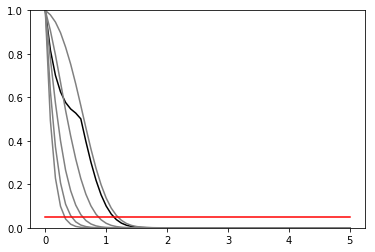

In [4]:
def plot_results(testmus,cls_obs, cls_exp, test_size = 0.05):
    plt.plot(mutests,cls_obs, c = 'k')
    for i,c in zip(range(5),['grey','grey','grey','grey','grey']):
        plt.plot(mutests,cls_exp[i], c = c)
    plt.plot(testmus,[test_size]*len(testmus), c = 'r')
    plt.ylim(0,1)

def invert_interval(testmus,cls_obs, cls_exp, test_size = 0.05):
    point05cross = {'exp':[],'obs':None}
    for cls_exp_sigma in cls_exp:
        yvals = [x for x in cls_exp_sigma]
        point05cross['exp'].append(np.interp(test_size,list(reversed(yvals)),list(reversed(testmus))))
        
    yvals = cls_obs
    point05cross['obs'] = np.interp(test_size,list(reversed(yvals)),list(reversed(testmus)))
    return point05cross


pyhf.runOnePoint(1.0, d, pdf, init_pars, par_bounds)[-2:]


mutests = np.linspace(0,5,61)
tests = [pyhf.runOnePoint(muTest, d, pdf, init_pars, par_bounds)[-2:] for muTest in mutests]
cls_obs = [test[0]  for test in tests]
cls_exp = [[test[1][i]  for test in tests] for i in range(5)]
plot_results(mutests, cls_obs, cls_exp)
invert_interval(mutests, cls_obs, cls_exp)